In [1]:
from bertopic import BERTopic
import os
os.chdir("..")
os.chdir("src")
import pandas as pd
from evaluate_bertopic import load_model_outputs, word_cloud_bertopic, get_bertopic_params
os.chdir("..")

## Get parameters

##### HDBSCAN

In [2]:
model_params_hdbscan = []
topn_list = [5, 6, 7, 8, 9, 10]
for t in topn_list:    
    topic_model, topics, probs = load_model_outputs(
        f"models/bertopic/topn_{t}/hdbscan/best_model"
        )
    params = get_bertopic_params(topic_model)
    model_params_hdbscan.append(params)   

In [3]:
bertopic_hdbscan_params = pd.DataFrame(model_params_hdbscan)
bertopic_hdbscan_params

,n_components,n_neighbors,min_dist,nr_topics,min_cluster_size,max_cluster_size,min_samples,alpha
0,4,38,0.75,19,34,31000,5,0.8
1,5,28,0.90,14,26,46000,10,1.1
2,11,44,0.60,14,18,37000,25,1.0
3,7,34,0.75,22,22,30000,5,1.2
4,7,30,0.60,28,30,39000,19,1.7
5,11,14,0.90,18,24,50000,25,1.3


In [7]:
bertopic_hdbscan_params.to_latex()

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n & n_components & n_neighbors & min_dist & nr_topics & min_cluster_size & max_cluster_size & min_samples & alpha \\\\\n\\midrule\n0 & 4 & 38 & 0.750000 & 19 & 34 & 31000 & 5 & 0.800000 \\\\\n1 & 5 & 28 & 0.900000 & 14 & 26 & 46000 & 10 & 1.100000 \\\\\n2 & 11 & 44 & 0.600000 & 14 & 18 & 37000 & 25 & 1.000000 \\\\\n3 & 7 & 34 & 0.750000 & 22 & 22 & 30000 & 5 & 1.200000 \\\\\n4 & 7 & 30 & 0.600000 & 28 & 30 & 39000 & 19 & 1.700000 \\\\\n5 & 11 & 14 & 0.900000 & 18 & 24 & 50000 & 25 & 1.300000 \\\\\n\\bottomrule\n\\end{tabular}\n'

##### K-Means

In [4]:
model_params_kmeans = []
topn_list = [5, 6, 7, 8, 9, 10]
for t in topn_list:    
    topic_model, topics, probs = load_model_outputs(
        f"models/bertopic/topn_{t}/kmeans/best_model"
        )
    params = get_bertopic_params(topic_model)
    model_params_kmeans.append(params)   

In [5]:
bertopic_kmeans_params = pd.DataFrame(model_params_kmeans)
bertopic_kmeans_params

,n_components,n_neighbors,min_dist,nr_topics,n_clusters,n_init,max_iter
0,11,16,0.55,30,60,12,310
1,13,20,0.35,15,135,7,250
2,9,16,0.75,14,100,20,430
3,14,24,0.35,23,125,6,320
4,13,26,0.35,20,70,16,270
5,10,14,0.60,22,100,20,470


# Visualize

In [19]:
topic_model.visualize_heatmap()

In [27]:
len(topic_model.get_topics())

18

In [47]:
topic_model.get_topic_freq()

,Topic,Count
2,-1,90797
0,0,11530
3,1,8493
8,2,4679
4,3,3451
1,4,3206
10,5,2450
11,6,1153
12,7,743
15,8,640


In [36]:
# topic_model.visualize_topics()

In [32]:
# topic_model.visualize_barchart(top_n_topics=len(topic_model.get_topics()), n_words=topic_model.top_n_words, title="")

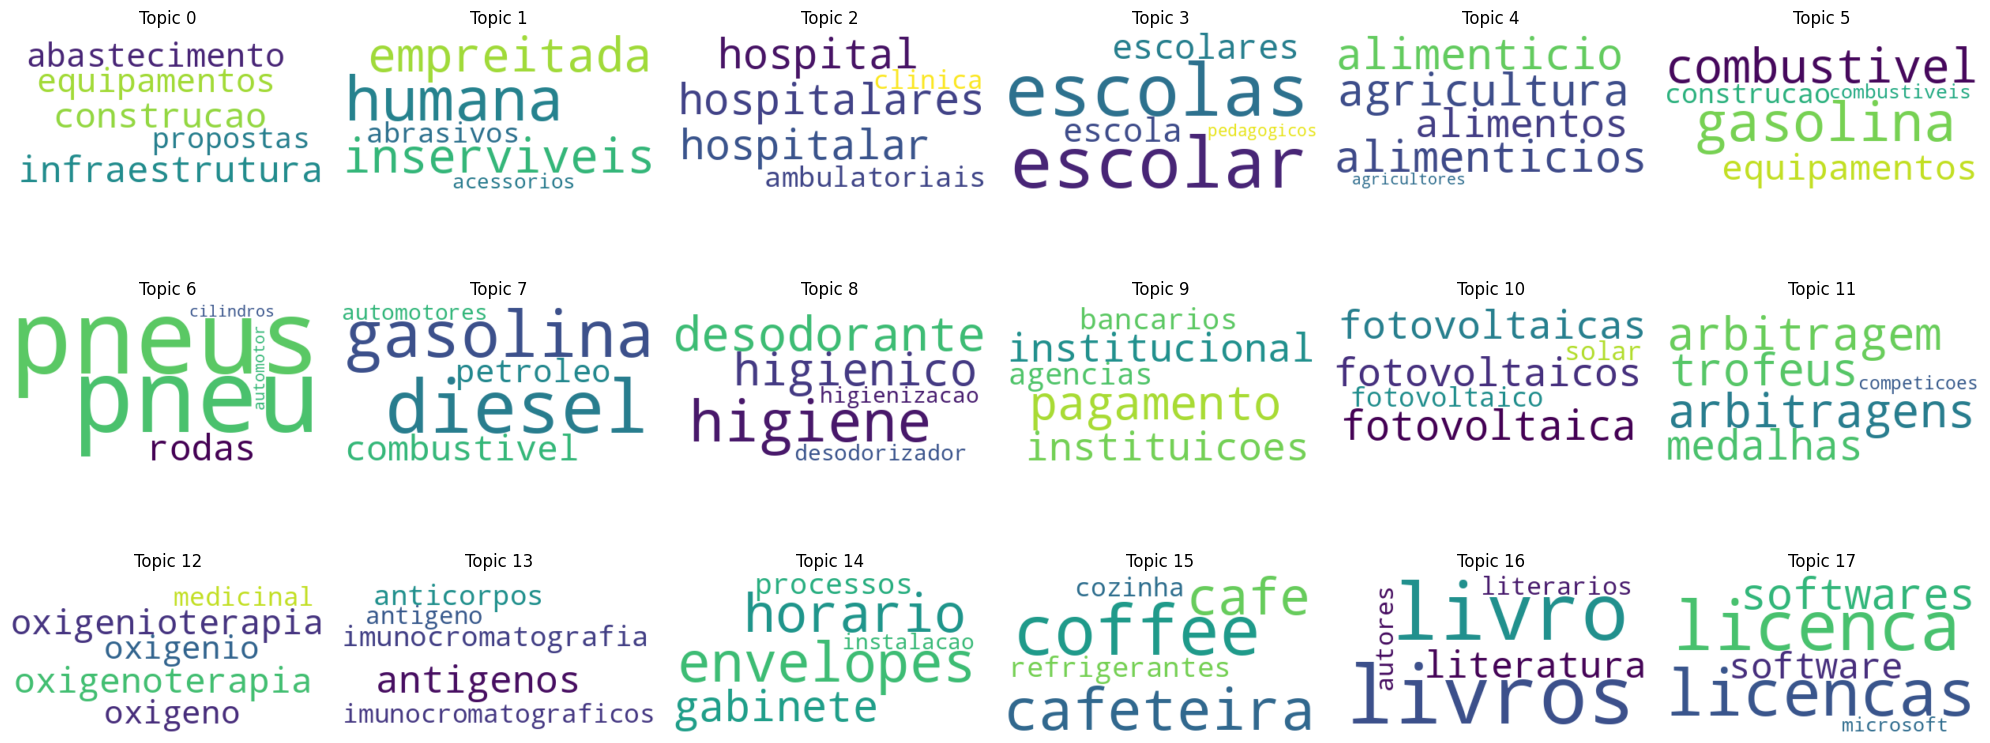

In [68]:
word_cloud_bertopic(topic_model)